In [ ]:
import tensorflow_hub as hub

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import cv2
import os
import pathlib

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_url="/content/drive/MyDrive/cancer/Brain tumor/Training"

In [ ]:
train_data_url=pathlib.Path(train_data_url)

In [ ]:
no_tumor=list(train_data_url.glob("no_tumor/*"))

In [ ]:
img_arr=cv2.imread(str(no_tumor[0]))

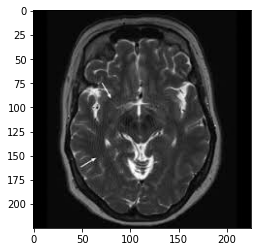

In [ ]:
plt.imshow(img_arr)

In [ ]:
data_dict={"glioma_tumor":list(train_data_url.glob("glioma_tumor/*")),
           "meningioma_tumor":list(train_data_url.glob("meningioma_tumor/*")),
           "no_tumor":list(train_data_url.glob("no_tumor/*")),
           "pituitary_tumor":list(train_data_url.glob("pituitary_tumor/*"))
           }

In [ ]:
len(data_dict["glioma_tumor"])

826

In [ ]:
len(data_dict["meningioma_tumor"])

822

In [ ]:
len(data_dict["no_tumor"])

395

In [ ]:
len(data_dict["pituitary_tumor"])

827

In [ ]:
data_dict_index={
    "no_tumor":0,
    "glioma_tumor":1,
    "meningioma_tumor":2,
    "pituitary_tumor":3
           }

In [ ]:
x,y=[],[]
for data,li in data_dict.items():
  for l in li:
    img_arr=cv2.imread(str(l))
    img_resize=cv2.resize(img_arr,(224,224))
    x.append(img_resize)
    y.append(data_dict_index[data])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x/255

In [ ]:
x.shape

(2870, 224, 224, 3)

In [ ]:
y.shape

(2870,)

In [ ]:
data_augmentation=keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomZoom(0.2),
     keras.layers.experimental.preprocessing.RandomContrast(0.3),
     keras.layers.experimental.preprocessing.RandomRotation([0.5,0.6])
    ]
)

In [ ]:
model=keras.Sequential(
    [
     #data_augmentation,
     hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",input_shape=(224,224,3),trainable=False),
     #keras.layers.Dropout(0.5),
     #keras.layers.Conv2D(filters=3,kernel_size=(3,3),padding="same",input_shape=(224,224,3)),
     #keras.layers.MaxPooling2D((2,2)),
     #keras.layers.Conv2D(filters=3,kernel_size=(3,3),padding="same"),
     keras.layers.MaxPooling2D((2,2)),

     keras.layers.Flatten(),
     keras.layers.Dense(72,activation="relu"),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(62,activation="relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(55,activation="relu"),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(4,activation="softmax")
    ]
)
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x,y,epochs=50)

Epoch 1/50
90/90 [==============================] - 2s 16ms/step - loss: 1.3809 - accuracy: 0.3064
Epoch 2/50
90/90 [==============================] - 1s 15ms/step - loss: 1.2729 - accuracy: 0.4292
Epoch 3/50
90/90 [==============================] - 1s 15ms/step - loss: 1.1601 - accuracy: 0.4991
Epoch 4/50
90/90 [==============================] - 1s 15ms/step - loss: 1.0416 - accuracy: 0.5510
Epoch 5/50
90/90 [==============================] - 1s 15ms/step - loss: 0.9675 - accuracy: 0.5748
Epoch 6/50
90/90 [==============================] - 1s 15ms/step - loss: 0.8942 - accuracy: 0.6282
Epoch 7/50
90/90 [==============================] - 1s 15ms/step - loss: 0.8326 - accuracy: 0.6474
Epoch 8/50
90/90 [==============================] - 1s 15ms/step - loss: 0.7892 - accuracy: 0.6621
Epoch 9/50
90/90 [==============================] - 1s 15ms/step - loss: 0.7570 - accuracy: 0.6804
Epoch 10/50
90/90 [==============================] - 1s 15ms/step - loss: 0.7041 - accuracy: 0.6947
Epoch 11/

In [ ]:
test_data_url="/content/drive/MyDrive/cancer/Brain tumor/Testing"

In [ ]:
test_data_url=pathlib.Path(test_data_url)

In [ ]:
test_data_dict={
    "glioma_tumor":list(test_data_url.glob("glioma_tumor/*")),
    "meningioma_tumor":list(test_data_url.glob("meningioma_tumor/*")),
    "no_tumor":list(test_data_url.glob("no_tumor/*")),
    "pituitary_tumor":list(test_data_url.glob("pituitary_tumor/*"))
}

In [ ]:
x_test,y_test=[],[]
for te,lis in test_data_dict.items():
  for li in lis:
    img_arr=cv2.imread(str(li))
    img_resize=cv2.resize(img_arr,(224,224))
    x_test.append(img_resize)
    y_test.append(data_dict_index[te])

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_test=x_test/255

In [ ]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 13ms/step - loss: 3.5149 - accuracy: 0.7360


[3.5148632526397705, 0.7360405921936035]

In [ ]:
model.save_weights("tumor_weight.h5")

In [ ]:
load_model=model.to_json()

In [ ]:
file=open("tumor_model.json","w")
file.write(load_model)
file.close()

In [ ]:
from google.colab import files

In [ ]:
#files.download("/content/tumor_model.json")

In [ ]:
#files.download("/content/tumor_weight.h5")

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict[0]

array([9.999528e-01, 1.982586e-13, 4.715017e-05, 8.394654e-10],
      dtype=float32)

In [ ]:
y_pred=[]
for x in y_predict:
  y_pred.append(np.argmax(x))

In [ ]:
from sklearn.metrics import confusion_matrix

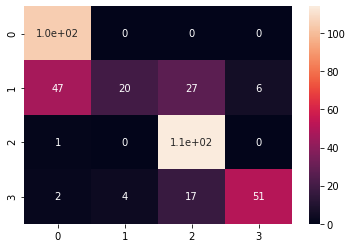

In [ ]:
sb.heatmap(confusion_matrix(y_test,y_pred,labels=[0,1,2,3]),annot=True)